# Sentiment Analysis of Tweets

In [72]:
import numpy as np
import pandas as pd 

## In this project, sentiments in tweets are analyzed. In brief, the goal is to classify the tweets based on positive sentiments using words (such as love, happy) and negative sentiments using words (racist, hate). The tasks performed are:
1. Data Collection Phase - used twitter dataset of kaggle
2. Preprocessing Phase: 
    a. Exploratory Data Analysis
    b. Data cleaning (Removing Punctuations and Stopwords)
3. Feature Extraction Phase - Countvectorization (Tockenization)
4. Classification - Train Naive Bayes Classifier
5. Evaluation Phase - Annalyze Model Performance

In [73]:
#reading the train and test dataset
tweets_test_df = pd.read_csv('test.csv')
tweets_train_df = pd.read_csv('train.csv')

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
tweets_train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Data Preprocessing - Exploratory Data Analysis

In [76]:
tweets_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [77]:
tweets_train_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [78]:
tweets_train_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [79]:
tweets_train_df.drop(['id'], axis=1, inplace=True)

In [80]:
tweets_train_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


## Exploring Dataset

<AxesSubplot:>

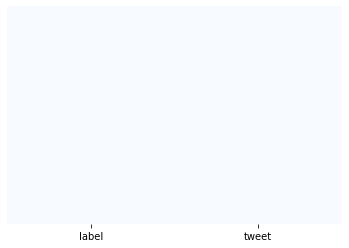

In [81]:
sns.heatmap(tweets_train_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

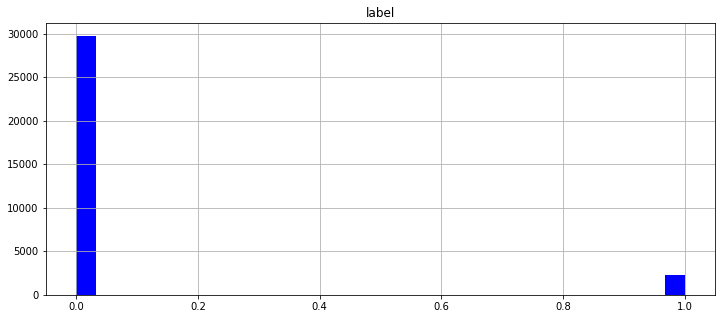

In [82]:
tweets_train_df.hist(bins= 30, figsize = (12,5), color = 'b')

<AxesSubplot:xlabel='label', ylabel='count'>

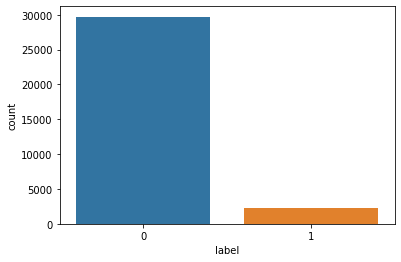

In [83]:
# These plots clearly shows that its a complete unbalanced data.
sns.countplot(x=tweets_train_df['label'] ,data=tweets_train_df)

In [84]:
tweets_test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [85]:
tweets_train_df['lengths'] = tweets_train_df['tweet'].apply(len)

In [86]:
tweets_train_df.head()

,label,tweet,lengths
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


<AxesSubplot:ylabel='Frequency'>

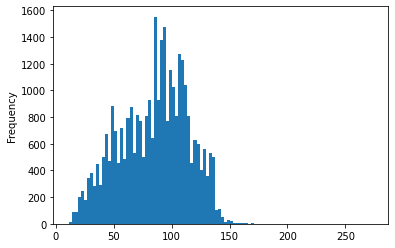

In [87]:
#distribution of tweets
tweets_train_df['lengths'].plot(bins=100, kind = 'hist')

In [88]:
tweets_train_df.describe()

,label,lengths
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [89]:
#Finding minimum length
tweets_train_df[tweets_train_df['lengths']==11]['tweet'].iloc[0]

'i love you '

In [90]:
# the mesage are brought down to an average length
tweets_train_df[tweets_train_df['lengths']==85]

,label,tweet,lengths
115,0,â #under the spell of brexit referendum - c...,85
242,0,make today count! #mondaymotivation #livelifet...,85
384,0,"dream palace, can we move in already? #stellar...",85
573,0,@user monkeys are also declared as vermin. no ...,85
634,0,save thousands $$ free search x logins x broke...,85
...,...,...,...
31393,0,#flagday2016 #flag #day #2016 #(30 #photos) ...,85
31468,0,jts88troxy theater jts88@user ð #love #si...,85
31542,0,stretched to the limit and still #waiting pati...,85
31773,0,this reminds me of this. i am love these two...,85


In [91]:
# Now separting positive and negative tweets
positive = tweets_train_df[tweets_train_df['label']==0]
positive

,label,tweet,lengths
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [92]:
negative = tweets_train_df[tweets_train_df['label']==1]
negative

,label,tweet,lengths
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [94]:
from wordcloud import WordCloud

In [95]:
sentences = tweets_train_df['tweet'].tolist()

In [96]:
#All tweets have been converted to a list sentences

In [97]:
len(sentences)

31962

In [98]:
#Joining sentences (combining all the sentences that we have)
sentences_as_single_string = " ".join(sentences)

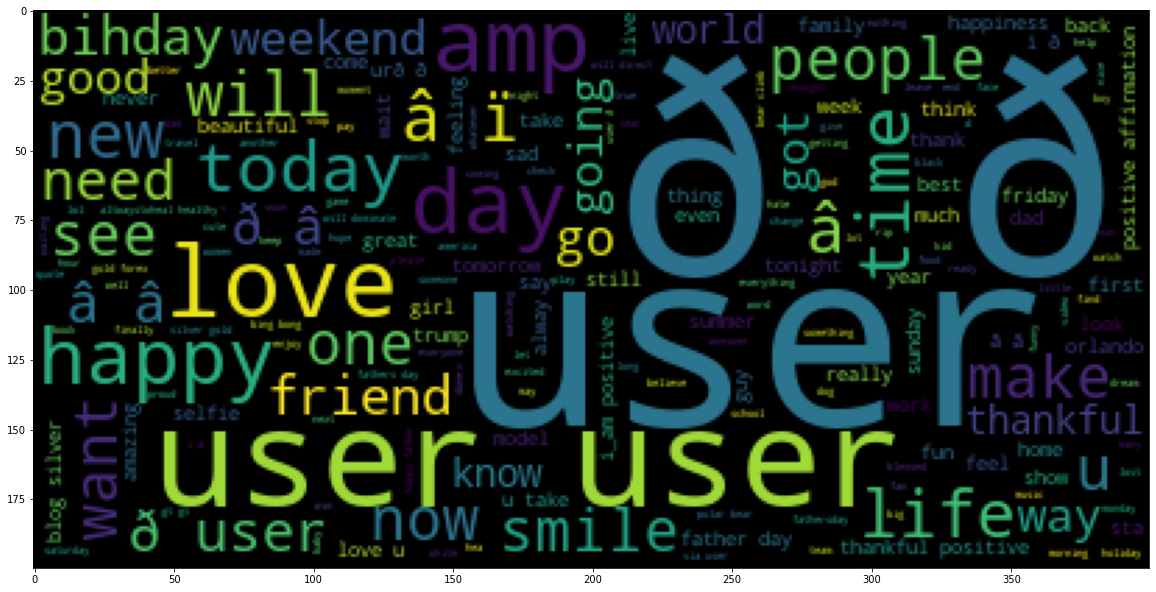

In [99]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_single_string))

In [100]:
# A wordcloud plot of negative words.
negative_sentences = negative['tweet'].tolist()
negative_string = " ".join(negative_sentences)

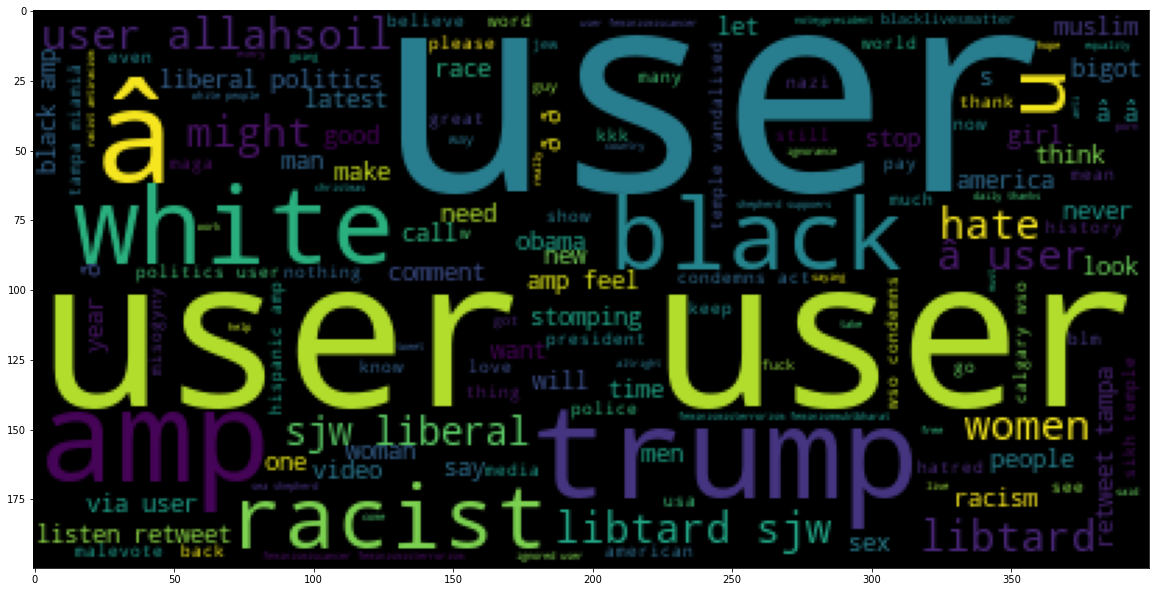

In [101]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_string))

## Preprocessing - Data cleaning (Remove punctuations from text)

In [102]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [103]:
sample = 'Hi! everyone :) ; enjoy learning real world example of NLP !.....'

In [104]:
sample_punc_removed = [char   for char in sample if char not in string.punctuation]

In [105]:
sample_punc_removed

['H',
 'i',
 ' ',
 'e',
 'v',
 'e',
 'r',
 'y',
 'o',
 'n',
 'e',
 ' ',
 ' ',
 ' ',
 'e',
 'n',
 'j',
 'o',
 'y',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'r',
 'e',
 'a',
 'l',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'e',
 'x',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'L',
 'P',
 ' ']

In [106]:
#Now join again
test_punc_removed_string = ''.join(sample_punc_removed)
test_punc_removed_string

'Hi everyone   enjoy learning real world example of NLP '

In [107]:
# Second and efficient method
out = sample.translate(str.maketrans('', '', string.punctuation))
out

'Hi everyone   enjoy learning real world example of NLP '

In [108]:
# Third and basic method
punc_removed = []
for char in sample:
    if char not in string.punctuation:
        punc_removed.append(char)
        
punc_removed_join = ''.join(punc_removed)
punc_removed_join

'Hi everyone   enjoy learning real world example of NLP '

## Preprocessing - Data cleaning (Remove StopWords from text)

In [110]:
# Downloading stopwords and plotting them using Natural languae toolkit
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Muskaan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
#Stop words that don't convey any specific information
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [112]:
# Removing common words and retaining only unique words
test_punc_removed_string_clean = [word for word in test_punc_removed_string.split() if word.lower() not in stopwords.words('english')]

In [113]:
test_punc_removed_string_clean

['Hi', 'everyone', 'enjoy', 'learning', 'real', 'world', 'example', 'NLP']

In [114]:
# Lets try Pipeline approach to accomplish removal of punctuation and stopwords
test_sample = 'A sample to learn,; that how can we remove punctuations and stopwords in a pipeline fashion!!!'


In [115]:
pipe_punc_removed_cleaned = [char for char in test_sample if char not in string.punctuation]
pipe_punc_removed_cleaned = ''.join(pipe_punc_removed_cleaned)
pipe_punc_removed_cleaned = [word for word in pipe_punc_removed_cleaned.split() if word.lower() not in stopwords.words('english')]
pipe_punc_removed_cleaned

['sample',
 'learn',
 'remove',
 'punctuations',
 'stopwords',
 'pipeline',
 'fashion']

## Feature Extraction - Count Vectorization (Tokenization)

In [116]:
# This will take unique words utilized in text as features, and then count that how many time each word is utilized in that sentence. 
from sklearn.feature_extraction.text import CountVectorizer
sample_new = ['This is first method.', 'This method is the second method.', 'This new one is the third one.' ]

In [117]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_new)

In [118]:
#Lets see the extracted feature names (unique words)
print (vectorizer.get_feature_names())

['first', 'is', 'method', 'new', 'one', 'second', 'the', 'third', 'this']


C:\Users\Muskaan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [119]:
X

<3x9 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [120]:
#We can see that in first sentence, only four features (unique words) are present there (first three and last feature).
#In second sentence of sample_new, word method is repeated two times, so we can see 2 at corresponding feature position
print(X.toarray())

[[1 1 1 0 0 0 0 0 1]
 [0 1 2 0 0 1 1 0 1]
 [0 1 0 1 2 0 1 1 1]]


In [121]:
# We can see with following example that Countvectroizer always convert each character to lower case before transforming.
second_sample = ['Hello World.', 'Hello Hello World', 'Hello World world world']
XX = vectorizer.fit_transform(second_sample)
print(XX.toarray())

[[1 1]
 [2 1]
 [1 3]]


## Now removing punctuations, removing stopwords and performing Tockenization on tweets in the dataset

In [122]:
def text_cleaning(text):
    remv_punc = [char for char in text.lower() if char not in string.punctuation]
    remv_punc_join = ''.join(remv_punc)
    remv_punc_clean = [word for word in remv_punc_join.split() if word.lower() not in stopwords.words('english')]
    return remv_punc_clean

In [123]:
#Lets visualize the newly created function
tweets_df_clean = tweets_train_df['tweet'].apply(text_cleaning)
print(tweets_df_clean[5])

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [124]:
#we have removed all punctuations and stopwords using a single user defined function
tweets_train_df['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [125]:
# Now we will use "analyser" to apply countvectorization; a preprocess step before applying countVectorization step.
vectorizer_analyzer = CountVectorizer(analyzer = text_cleaning)
countvectorizer_tweets = CountVectorizer(analyzer= text_cleaning, dtype= 'uint8').fit_transform(tweets_train_df['tweet']).toarray()

In [126]:
countvectorizer_tweets.shape

(31962, 47385)

In [127]:
X_features = countvectorizer_tweets
y_label = tweets_train_df['label']

## Now we will train a Naive Bayes Classifier Model

In [128]:
X_features.shape

(31962, 47385)

In [129]:
y_label.shape

(31962,)

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 1)

In [131]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [132]:
from sklearn.naive_bayes import MultinomialNB
NaiveBclassifier = MultinomialNB()
NaiveBclassifier.fit(X_train,y_train)

MultinomialNB()

## Evaluation Phase - Analyzing the model performance

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

In [134]:
# Predicting test cases
y_pred_test = NaiveBclassifier.predict(X_test)

<AxesSubplot:>

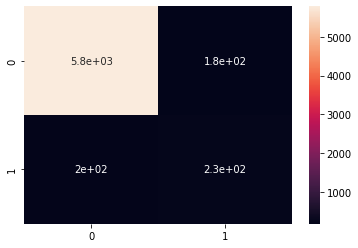

In [135]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot= True)

## Calculating the accuracy of the Model

In [142]:
from sklearn import metrics
print("Accuracy of classification model:",metrics.accuracy_score(y_test, y_pred_test))

Accuracy of classification model: 0.9410292507430001


In [140]:
print("F1 Score for negative tweets: ",metrics.f1_score(y_test, y_pred_test, average=None)[0])

F1 Score for negative tweets:  0.9684333919450724


In [141]:
print("F1 Score for positive tweets: ",metrics.f1_score(y_test, y_pred_test, average=None)[1])

F1 Score for positive tweets:  0.5527876631079477
